<a href="https://colab.research.google.com/github/anshmehta337/deep-learning/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import numpy as np

In [26]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [27]:
device

device(type='cuda')

In [28]:
#lets work with data augmentation too
transform=transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2,saturation=0.2),
    transforms.RandomCrop(32,padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

In [29]:
train_Dataset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
test_Dataset=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)

In [30]:
batch_size=100
train_loader=DataLoader(train_Dataset,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(test_Dataset,batch_size=batch_size,shuffle=False)

torch.Size([100, 3, 32, 32])
torch.Size([100])


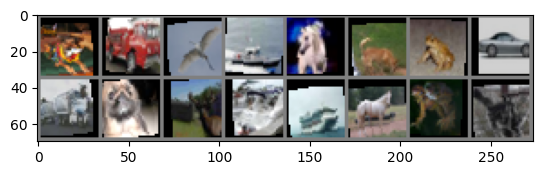

In [31]:
for i, (images, labels) in enumerate(train_loader):
    print(images.shape)
    print(labels.shape)
    break
def imshow(img):
    # unnormalize
    img=img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# show images
imshow(torchvision.utils.make_grid(images[:16]))

In [32]:
classes = {
    'plane': 0,
    'car': 1,
    'bird': 2,
    'deer': 3,
    'dog': 4,
    'frog': 5,
    'horse': 6,
    'ship': 7,
    'truck': 8
}


In [33]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=(3,3), padding='same'),  # Output: (32, 32, 32)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),        # Output: (32, 16, 16)

            nn.Conv2d(32, 64, kernel_size=(3,3)),             # Output: (64, 14, 14)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))         # Output: (64, 7, 7)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),                                # Flatten to (64 * 7 * 7 = 3136)
            nn.Linear(64 * 7 * 7, 600),                  # Corrected input size
            nn.ReLU(),
            nn.Linear(600, 120),
            nn.ReLU(),
            nn.Linear(120, 10)
        )

    def forward(self, x):
        x = self.network(x)
        x = self.fc_layers(x)
        return x

In [34]:
# Training function
def train_model(model, criterion, optimizer, train_loader, val_loader, epochs=5):
    train_losses, val_losses, val_accuracy = [], [], []
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_losses.append(train_loss / len(train_loader))

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            correct = 0
            total = 0
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_losses.append(val_loss / len(val_loader))
        val_accuracy.append(correct/total)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Accuracy:  {100 * val_accuracy[-1]:.2f}%")

    return train_losses, val_losses, val_accuracy

In [37]:
num_epochs = 5
learning_rate = 0.001
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_losses, val_losses, val_accuracy = train_model(model_aug, criterion, optimizer, train_Dataset, test_Dataset, epochs=5)

AttributeError: 'int' object has no attribute 'to'